In [11]:

# 2. Determine the number of rows and columns in the dataset
import pandas as pd
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}, Number of columns: {num_cols}")


Number of rows: 5268, Number of columns: 13


In [12]:

# 3. Display the last 75 rows in the dataset
print(df.tail(75))

            Date   Time                                           Location  \
5193  03/15/2008  08:15                                     Nbagu, Nigeria   
5194  04/03/2008  11:00                                     Lawa, Suriname   
5195  04/09/2008  23:27                                Bundeena, Australia   
5196  04/11/2008  22:15                                 Chrisinau, Moldova   
5197  04/15/2008  14:30                                        Goma, Congo   
...          ...    ...                                                ...   
5263  05/20/2009  06:30                             Near Madiun, Indonesia   
5264  05/26/2009    NaN                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  00:15  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009  08:30       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009    NaN                  State of Arunachal Pradesh, India   

                             Operator Flight #  \
5193        T

In [13]:

# 4. Methods for treating missing data in each column (except the first one)
for col in df.columns[1:]:
    num_missing = df[col].isnull().sum()
    dtype = df[col].dtype
    if dtype == 'object':
        method = "Impute with mode or 'Unknown'"
        justification = "Categorical data; mode or a placeholder is appropriate."
    else:
        method = "Impute with mean/median"
        justification = "Numerical data; mean or median preserves distribution."
    print(f"Column: {col}, Missing: {num_missing}, Method: {method}, Justification: {justification}")


Column: Time, Missing: 2219, Method: Impute with mode or 'Unknown', Justification: Categorical data; mode or a placeholder is appropriate.
Column: Location, Missing: 20, Method: Impute with mode or 'Unknown', Justification: Categorical data; mode or a placeholder is appropriate.
Column: Operator, Missing: 18, Method: Impute with mode or 'Unknown', Justification: Categorical data; mode or a placeholder is appropriate.
Column: Flight #, Missing: 4199, Method: Impute with mode or 'Unknown', Justification: Categorical data; mode or a placeholder is appropriate.
Column: Route, Missing: 1707, Method: Impute with mode or 'Unknown', Justification: Categorical data; mode or a placeholder is appropriate.
Column: Type, Missing: 27, Method: Impute with mode or 'Unknown', Justification: Categorical data; mode or a placeholder is appropriate.
Column: Registration, Missing: 335, Method: Impute with mode or 'Unknown', Justification: Categorical data; mode or a placeholder is appropriate.
Column: cn/In

In [14]:

# 5. Create 'fatality_locations' dataframe
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()
fatality_locations.head()


,Date,Location,Aboard,Fatalities
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0
3,09/09/1913,Over the North Sea,20.0,14.0
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0


In [15]:

# 6. Date of the highest number of recorded fatalities
max_fatalities_idx = fatality_locations['Fatalities'].idxmax()
date_max_fatalities = fatality_locations.loc[max_fatalities_idx, 'Date']
print(f"Date with highest fatalities: {date_max_fatalities}")


Date with highest fatalities: 03/27/1977


In [16]:

# 7. Compare Aboard vs Fatalities, count crashes with zero fatalities
zero_fatalities = fatality_locations[fatality_locations['Fatalities'] == 0]
num_zero_fatalities = zero_fatalities.shape[0]
print(f"Number of crashes with zero fatalities: {num_zero_fatalities}")


Number of crashes with zero fatalities: 58


In [17]:

# 8. Split 'Location' into 'Region' and 'State/Country'
location_split = fatality_locations['Location'].str.split(',', n=1, expand=True)
fatality_locations['Region'] = location_split[0]
fatality_locations['State/Country'] = location_split[1].str.strip() if location_split.shape[1] > 1 else None
fatality_locations.head()


,Date,Location,Aboard,Fatalities,Region,State/Country
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0,Fort Myer,Virginia
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0,AtlantiCity,New Jersey
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0,Victoria,"British Columbia, Canada"
3,09/09/1913,Over the North Sea,20.0,14.0,Over the North Sea,None
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0,Near Johannisthal,Germany


In [18]:

# 9. Order by fatalities and select top 100
top_100 = fatality_locations.sort_values(by='Fatalities', ascending=False).head(100)
top_100


,Date,Location,Aboard,Fatalities,Region,State/Country
2963,03/27/1977,"Tenerife, Canary Islands",644.0,583.0,Tenerife,Canary Islands
3568,08/12/1985,"Mt. Osutaka, near Ueno Village, Japan",524.0,520.0,Mt. Osutaka,"near Ueno Village, Japan"
4455,11/12/1996,"Near Charkhidadri, India",349.0,349.0,Near Charkhidadri,India
2726,03/03/1974,"Near Ermenonville, France",346.0,346.0,Near Ermenonville,France
3562,06/23/1985,"AtlantiOcean, 110 miles West of Ireland",329.0,329.0,AtlantiOcean,110 miles West of Ireland
...,...,...,...,...,...,...
3198,01/21/1980,"Elburz Mtns., near Laskarak, Markazi, Iran",128.0,128.0,Elburz Mtns.,"near Laskarak, Markazi, Iran"
1701,12/16/1960,"Staten Island / Brooklyn, New York",128.0,128.0,Staten Island / Brooklyn,New York
4852,04/15/2002,"Busan, South Korea",166.0,128.0,Busan,South Korea
3970,10/02/1990,"Guangzhou, China",226.0,128.0,Guangzhou,China


Matplotlib is building the font cache; this may take a moment.


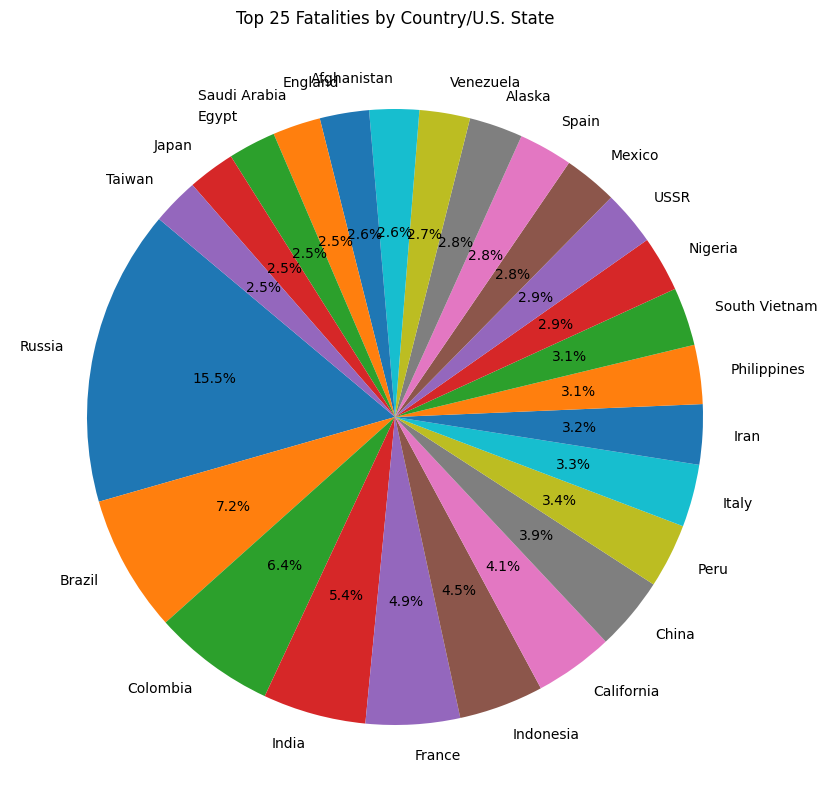

In [19]:

# 10. Pie chart of top 25 fatalities per country/state
import matplotlib.pyplot as plt
top_25 = fatality_locations.groupby('State/Country')['Fatalities'].sum().sort_values(ascending=False).head(25)
plt.figure(figsize=(10, 10))
top_25.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Top 25 Fatalities by Country/U.S. State')
plt.ylabel('')
plt.show()